
# Linear Regression 

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [2]:
def load_data(path):
    return pd.read_csv(path)

In [3]:
customers = load_data("Ecommerce Customers")

**Check the head of customers, and check out its info() and describe() methods.**

In [4]:
#top 5 rows of Dataset
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
#stats of dataset
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Well, here we check about the how much data is scattered, we check min and max value of each features.

In [6]:
#check inforamation about dataset
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Well, Here check about null values of each features, abhout dtype of each features.

In [8]:
#columns of dataset
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [9]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

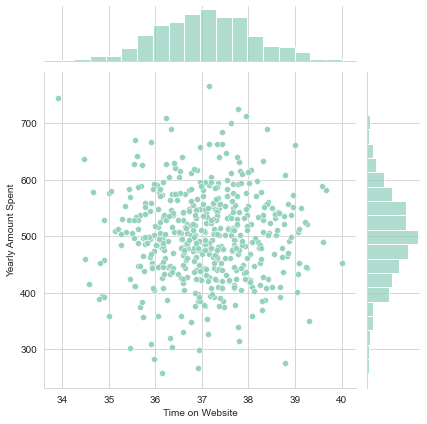

In [10]:
# More time on site, more money spent.
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

Well, we can analyse that most amount are spent between 400-600 and time on website are spent between 35-39. 

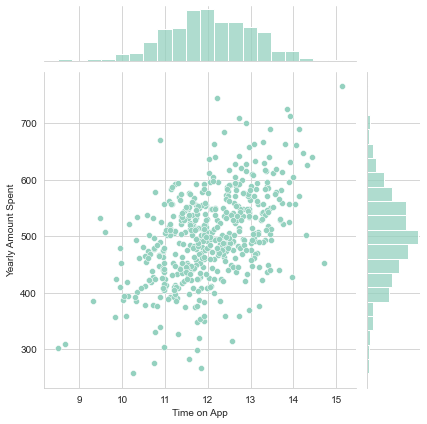

In [11]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

Well, here yearly amount is dorectly proportional to time spent on app. more time spend on app need to spent more amount. 

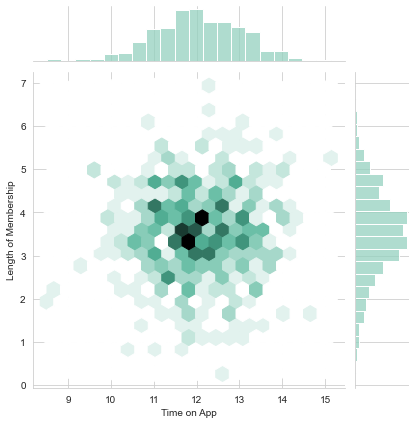

In [13]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

Well, from this plot we analyze that mostly users spent the time between 11-13. In this period, membership are more rather than those who spend less or more time.

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

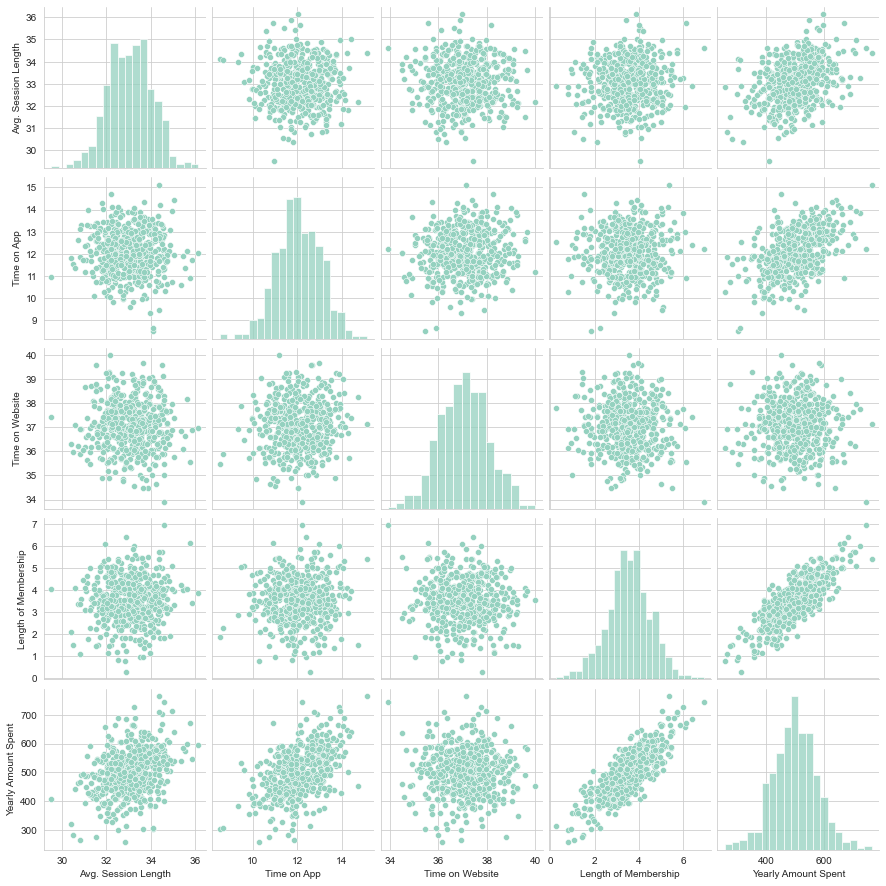

In [15]:
sns.pairplot(customers)

Well, Here this plot tell us the distribution of single variables and relationships between two variables. Here we can see that mostly yearly amount spent is depend on Length of membership.

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

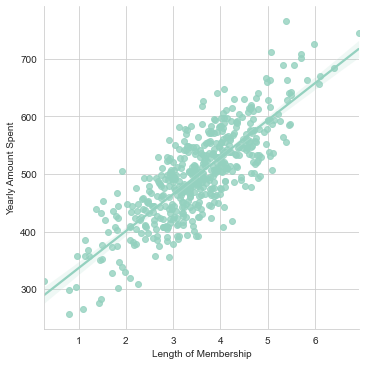

In [17]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

Here, we can see those who spent time between 400-600 yearly the length of membership increases. but as we spent more the membership also decrease.

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [18]:
y = customers['Yearly Amount Spent']

In [19]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Create an instance of a LinearRegression() model named lm.**

In [24]:
lr= LinearRegression()

** Train/fit lm on the training data.**

In [25]:
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
pred_lr=lr.predict(X_train)
pred_lr[:5]

array([449.37127211, 557.83561344, 553.33581248, 486.00868673,
       548.08127168])

In [39]:
y_train.ravel()[:5]

array([443.96562681, 556.29814117, 549.13157329, 487.37930602,
       561.51653198])

**Print out the coefficients of the model**

In [27]:
# The coefficients
print('Coefficients: \n', lr.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


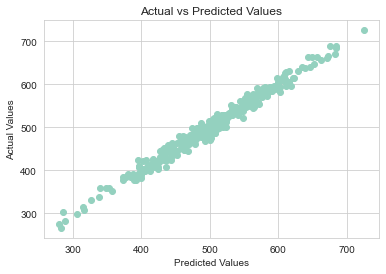

In [40]:
plt.scatter(pred_lr, y_train)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [41]:
print("Mean Absolute Error: ", mean_absolute_error(y_train, pred_lr))
print("Mean Squared Error: ", mean_squared_error(y_train, pred_lr))
print("RMSE :", np.sqrt(mean_absolute_error(y_train, pred_lr)))

Mean Absolute Error:  8.181347287342827
Mean Squared Error:  106.85137432285693
RMSE : 2.8603054535036687


In [43]:
print("R2 Score: ", round((r2_score(y_train, pred_lr)*100),2))

R2 Score:  98.18


#### Decision Tree

In [44]:
dc=DecisionTreeRegressor()

In [46]:
dc.fit(X_train, y_train)

DecisionTreeRegressor()

In [50]:
pred_dc=dc.predict(X_train)
pred_dc[:10]

array([443.96562681, 556.29814117, 549.13157329, 487.37930602,
       561.51653198, 537.8252823 , 444.58216498, 542.41247673,
       549.00822693, 439.07476674])

In [51]:
y_train.ravel()[:10]

array([443.96562681, 556.29814117, 549.13157329, 487.37930602,
       561.51653198, 537.8252823 , 444.58216498, 542.41247673,
       549.00822693, 439.07476674])

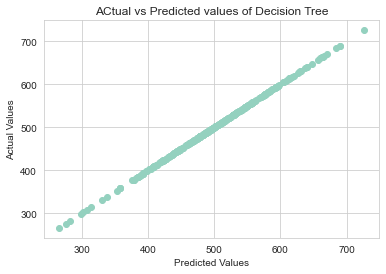

In [52]:
plt.scatter(pred_dc, y_train)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("ACtual vs Predicted values of Decision Tree")
plt.show()

In [53]:
print("Mean Absolute Error: ", mean_absolute_error(y_train,pred_dc))
print("Mean Squared Error: ", mean_squared_error(y_train, pred_dc))
print("RMSE: ", np.sqrt(mean_squared_error(y_train, pred_dc)))

Mean Absolute Error:  0.0
Mean Squared Error:  0.0
RMSE:  0.0


In [54]:
print("R2 Score: ", round((r2_score(y_train, pred_dc)*100),2))

R2 Score:  100.0


### Random Forest

In [55]:
rand_for=RandomForestRegressor()

In [56]:
rand_for.fit(X_train, y_train)

RandomForestRegressor()

In [57]:
pred_for=rand_for.predict(X_train)
pred_for[:5]

array([447.83644678, 547.91640762, 550.91977945, 482.17366144,
       559.55062522])

In [58]:
y_train.ravel()[:5]

array([443.96562681, 556.29814117, 549.13157329, 487.37930602,
       561.51653198])

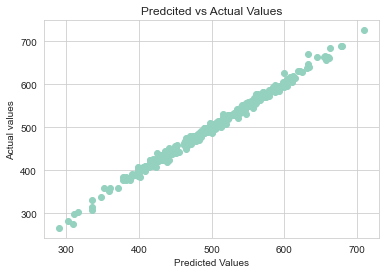

In [59]:
plt.scatter(pred_for, y_train)
plt.xlabel("Predicted Values")
plt.ylabel("Actual values")
plt.title("Predcited vs Actual Values")
plt.show()

In [60]:
print("Mean Absolute Error: ", mean_absolute_error(y_train,pred_for))
print("Mean Squared Error: ", mean_squared_error(y_train, pred_for))
print("RMSE: ", np.sqrt(mean_squared_error(y_train, pred_for)))

Mean Absolute Error:  5.414753602040242
Mean Squared Error:  55.940001332611736
RMSE:  7.479304869612665


In [61]:
print("R2 Score: ", round((r2_score(y_train, pred_for)*100),2))

R2 Score:  99.04


## Fine Tune Model

In [62]:
from sklearn.model_selection import cross_val_score
lr_score=cross_val_score(lr,X_train, y_train, scoring="neg_mean_squared_error", cv=10)
dc_score=cross_val_score(dc, X_train,y_train, scoring="neg_mean_squared_error", cv=10)
rand_score=cross_val_score(rand_for, X_train,y_train, scoring="neg_mean_squared_error", cv=10)
print("Linear Regression rmse_scores: ",np.sqrt(-lr_score))
print("DEcission Tress Regressior rmse_scores: ",np.sqrt(-dc_score))
print("Random Forest Regressior rmse_scores: ",np.sqrt(-rand_score))

Linear Regression rmse_scores:  [10.89922701 11.46455775 10.35788617  9.04065693 10.48394492 10.83886494
 11.57158569 10.27490313 10.43604577  9.48522314]
DEcission Tress Regressior rmse_scores:  [34.14002463 32.43361758 30.85439995 28.74569828 37.03854518 29.09866385
 30.0567603  21.57820133 27.28792627 28.96530961]
Random Forest Regressior rmse_scores:  [21.00954664 16.04500399 20.15983764 17.73090183 29.89196827 18.46255297
 20.46241697 19.70663768 19.35983233 21.09546386]


In [63]:
def display_scores(score):
    print("Scores : ", score)
    print("Mean : ", score.mean())
    print("Standard Deviation : ", score.std())

In [64]:
print("linear Regression")
display_scores(lr_score)

linear Regression
Scores :  [-118.7931494  -131.43608434 -107.28580586  -81.73347778 -109.9131011
 -117.48099329 -133.90159527 -105.57363426 -108.91105133  -89.96945801]
Mean :  -110.49983506353496
Standard Deviation :  15.459463669913738


In [65]:
print("Decision Tree")
display_scores(dc_score)

Decision Tree
Scores :  [-1165.54128198 -1051.93954953  -951.99399649  -826.31516951
 -1371.85382896  -846.73223762  -903.40883993  -465.61877254
  -744.63092007  -838.98916102]
Mean :  -916.7023757653642
Standard Deviation :  232.59083609155195


In [66]:
print("Random Forest")
display_scores(rand_score)

Random Forest
Scores :  [-441.40105008 -257.44215316 -406.41905365 -314.38487986 -893.5297671
 -340.86586203 -418.71050822 -388.35156871 -374.80310776 -445.01859533]
Mean :  -428.09265459044684
Standard Deviation :  164.84288608523275


Well, here we can see that the best model is Random Forest.Decision Tree perform worse.

## Hyperparameter tuning

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [71]:
param={"n_estimators": randint(low=1, high=200),
      "max_features" : randint(low=1, high=8)}
rand_fores=RandomForestRegressor(random_state=42)
rand_fores_search=RandomizedSearchCV(rand_for,param_distributions=param, n_iter=10,cv=5, scoring="neg_mean_squared_error" ,random_state=42)
rand_fores_search.fit(X_train, y_train)



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Admin\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Admin\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Admin\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Admin\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Admin\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Admin\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Admin\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Admin\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Admin\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Admin\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Admin\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Admin\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Admin\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Admin\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Admin\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Admin\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Admin\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Admin\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EC81D8ACA0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EC81D97190>},
                   random_state=42, scoring='neg_mean_squared_error')

In [76]:
print("Random Forest")
curves=rand_fores_search.cv_results_
for mean_score, params in zip(curves['mean_test_score'], curves['params']):
    print(np.sqrt(-mean_score), params)

Random Forest
nan {'max_features': 7, 'n_estimators': 180}
nan {'max_features': 5, 'n_estimators': 15}
21.291160550550046 {'max_features': 3, 'n_estimators': 72}
nan {'max_features': 5, 'n_estimators': 21}
nan {'max_features': 7, 'n_estimators': 122}
21.22145978663978 {'max_features': 3, 'n_estimators': 75}
20.8650772674684 {'max_features': 3, 'n_estimators': 88}
nan {'max_features': 5, 'n_estimators': 100}
21.115909066715343 {'max_features': 3, 'n_estimators': 150}
nan {'max_features': 5, 'n_estimators': 2}


In [77]:
def error(y, y_hat):
    mse = ((y - y_hat)**2).sum() / len(y)
    return np.sqrt(mse)

In [80]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(loss="squared_loss", penalty="l2")

In [81]:
sgd.fit(X_train,y_train)

SGDRegressor()

In [83]:
pred_sgd=sgd.predict(X_train)
pred_sgd[:10]

array([-7.06359366e+11, -7.07856902e+11, -8.08655533e+11, -7.56100131e+11,
       -7.62234467e+11, -7.89271310e+11, -6.91236837e+11, -7.63168925e+11,
       -7.28663738e+11, -6.84844372e+11])

In [84]:
y_train.ravel()[:5]

array([443.96562681, 556.29814117, 549.13157329, 487.37930602,
       561.51653198])

In [87]:
er=error(y_train.ravel(), pred_sgd)
er

758511136309.0079

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [88]:
predictions = lr.predict( X_test)

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

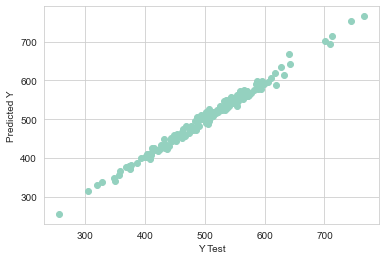

In [89]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [90]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430853
MSE: 79.81305165097481
RMSE: 8.933815066978655


In [94]:
print("r2_score: ", round((r2_score(y_test, predictions)*100),2))

r2_score:  98.9


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


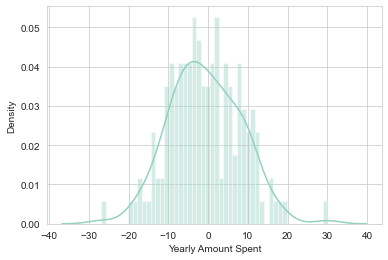

In [91]:
sns.distplot((y_test-predictions),bins=50)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [93]:
coeffecients = pd.DataFrame(lr.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can you interpret these coefficients? **

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Do you think the company should focus more on their mobile app or on their website?**


This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!


## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.